# Farrow resampler

Based on:
https://www.dsprelated.com/showarticle/149.php

In [1]:
import numpy as np
import pylab as plt
from scipy.signal import firwin
from utils import *
%matplotlib inline
np.set_printoptions(precision=4)

In [2]:
# test signal
FREQ = 5
N1 = 32
N2 = 50
x = np.arange(0, N1)
y = np.sin(x*2*np.pi/(N1/FREQ))

In [3]:
cMatrix = [
0.000045, -0.000936,  0.004049, -0.011926,  0.029106, -0.066340,  0.180800,  0.952919, -0.122473,  0.050329, -0.021920,  0.008548, -0.002638,  0.000476, 
 0.000164, -0.008294,  0.034886, -0.100099,  0.237076, -0.499944,  1.288540, -0.558971, -0.574282,  0.260273, -0.110664,  0.039675, -0.010165,  0.000669, 
 0.004461, -0.000724, -0.024895,  0.100726, -0.258546,  0.376681,  0.446216, -1.663592,  1.469000, -0.649437,  0.283180, -0.107185,  0.030675, -0.003629, 
-0.005606,  0.014003, -0.025966,  0.040406, -0.073976,  0.370403, -0.962637,  1.147171, -0.721917,  0.316915, -0.142048,  0.056324, -0.017396,  0.002484,  
]
NTAPS = 14
ORDER = 3

In [4]:
def c(ixTap, ixPower):
    return cMatrix[ixPower * (NTAPS) + ixTap]

In [5]:
audio_delay_line = np.zeros(NTAPS)
delay_line_sample = 0

In [6]:
def get_imp(tap, frac):
    horner_sum = c(tap, ORDER)
    for i in range(ORDER-1, -1, -1,):
        horner_sum *= frac
        horner_sum += c(tap, i)
    return horner_sum

In [7]:
def get_c(frac):
    return [get_imp(i, frac) for i in range(NTAPS)]

In [8]:
def process_sample(frac):
    fir_c = get_c(frac)
    v = np.sum(audio_delay_line*fir_c)
    return v

In [9]:
x_out = np.arange(0, N1, N1/N2)

In [10]:
y_out = np.array([])
for i in range(N2):
    while(x[delay_line_sample] < np.floor(x_out[i])):
        audio_delay_line = np.roll(audio_delay_line, 1)
        audio_delay_line[0] = y[int(x_out[i])]
        delay_line_sample += 1
    v = process_sample(x_out[i] % 1)
    y_out = np.append(y_out, v)
# delay compensation
x_out = x_out - (NTAPS-1)

In [11]:
x_ideal = np.arange(0, N1, 1/1000)
y_ideal = np.sin(x_ideal*2*np.pi/(N1/FREQ))

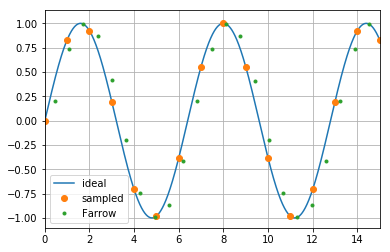

In [12]:
plt.plot(x_ideal, y_ideal, label="ideal")
plt.plot(x, y, 'o', label="sampled")
plt.plot(x_out, y_out, '.', label="Farrow")
plt.grid()
plt.xlim(0, 15)
plt.legend()
plt.show()